# KELOMPOK 6 DEEP LEARNING

ANGGOTA KELOMPOK : 
- Anugrah Aidin Yotolembah F551 20 093
- Fajar Dzulnufrie Hafriadi F551 20 089
- Asmaun Hasyanah Sary F551 20 092
- Mutiara Sari Muti F551 20 091
- Iga Mawarni F551 20 099

# A. Load Data

1. Memasukkan Library

In [260]:
import numpy as np
import pandas as pd 
import os 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

# B. Preprocessing Data

1. menentukan Image Size dan class pada dataset 

In [261]:
IMAGE_SIZE = 224
classes = 5

2. memasukkan dataset gambar 

In [278]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=5,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        fill_mode="nearest")

train_generator = train_datagen.flow_from_directory(
        'PersonDataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse")

Found 581 images belonging to 5 classes.


In [279]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=5,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        fill_mode="nearest")

test_generator = train_datagen.flow_from_directory(
        'PersonDataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse")

Found 581 images belonging to 5 classes.


3. melihat nama class berdasarkan dataset 

In [280]:
class_names = list(train_generator.class_indices.keys())
class_names

['Anugrah Aidin Yotolembah',
 'Asmaun Hasyanah Sary',
 'Fajar Dzulnufrie Hafriadi',
 'Iga Mawarni',
 'Mutiara Sari']

# C. Create Model

1. memakai model arsitektur vgg16

In [265]:
vgg16 = VGG16(weights='imagenet', include_top = False, input_shape=(224, 224, 3))
vgg16.trainable = False

2. melihat layer pada model arsitektur vgg16

In [266]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

3. memakai  model arsitektur lapisan pada pada layer

In [267]:
model = Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(classes, activation='softmax'))

In [268]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

4. melihat layer padat pada model arsitektur sequential

In [269]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 5)                 125445    
                                                                 
Total params: 14,840,133
Trainable params: 125,445
Non-trainable params: 14,714,688
_________________________________________________________________


# D. Training / validation including visualization

1. training dataset gambar

In [270]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=5,
    batch_size= 25,
    shuffle= True)

Epoch 1/5
15/15 [==============================] - 180s 12s/step - loss: 0.7299 - accuracy: 0.6226 - val_loss: 0.3362 - val_accuracy: 0.8655
Epoch 2/5
15/15 [==============================] - 196s 14s/step - loss: 0.3168 - accuracy: 0.8742 - val_loss: 0.2435 - val_accuracy: 0.9111
Epoch 3/5
15/15 [==============================] - 194s 13s/step - loss: 0.2155 - accuracy: 0.9197 - val_loss: 0.1692 - val_accuracy: 0.9414
Epoch 4/5
15/15 [==============================] - 182s 12s/step - loss: 0.1683 - accuracy: 0.9393 - val_loss: 0.1365 - val_accuracy: 0.9479
Epoch 5/5
15/15 [==============================] - 176s 12s/step - loss: 0.1282 - accuracy: 0.9631 - val_loss: 0.1063 - val_accuracy: 0.9696


2. mencari tau score dari data training 

In [271]:
score = model.evaluate(train_generator)

15/15 [==============================] - 88s 6s/step - loss: 0.1166 - accuracy: 0.9696


3. melihat atribut yang di pakai 

In [272]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

4. menentukan akurasi, val_akurasi, loss, dan validasi loss pada data

In [273]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

EPOCH = 5

5. visualisasi training dan validasi akurasi dan loss 

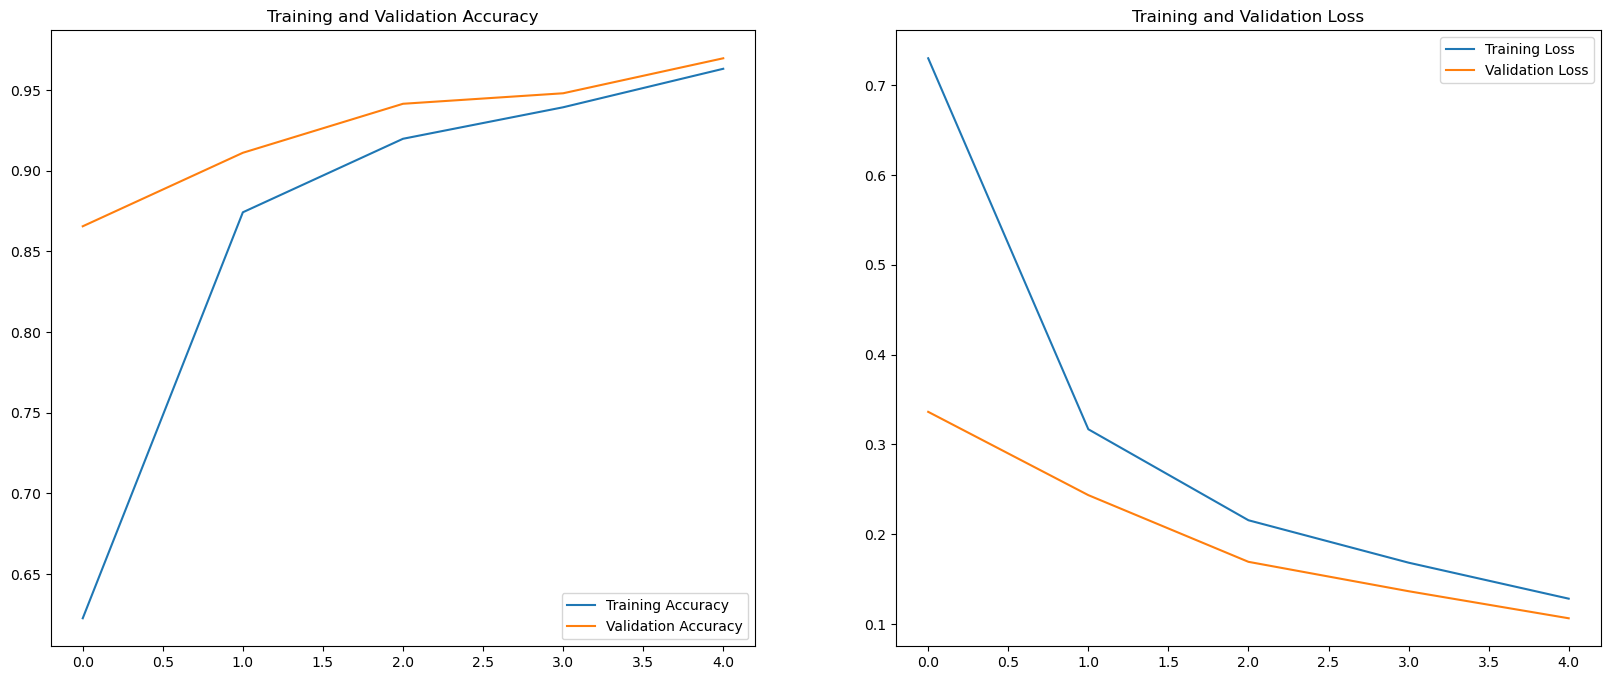

In [274]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCH), acc, label='Training Accuracy')
plt.plot(range(EPOCH), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCH), loss, label='Training Loss')
plt.plot(range(EPOCH), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# E. Testing including visualization and caption

1. melakukan testing data dan prediksi gambar

In [286]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = "Laki - Laki" if predictions[0][0] > 0.6 else "Perempuan"
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

2. visualisasi dari prediksi gambar

1/1 [==============================] - 0s 237ms/step


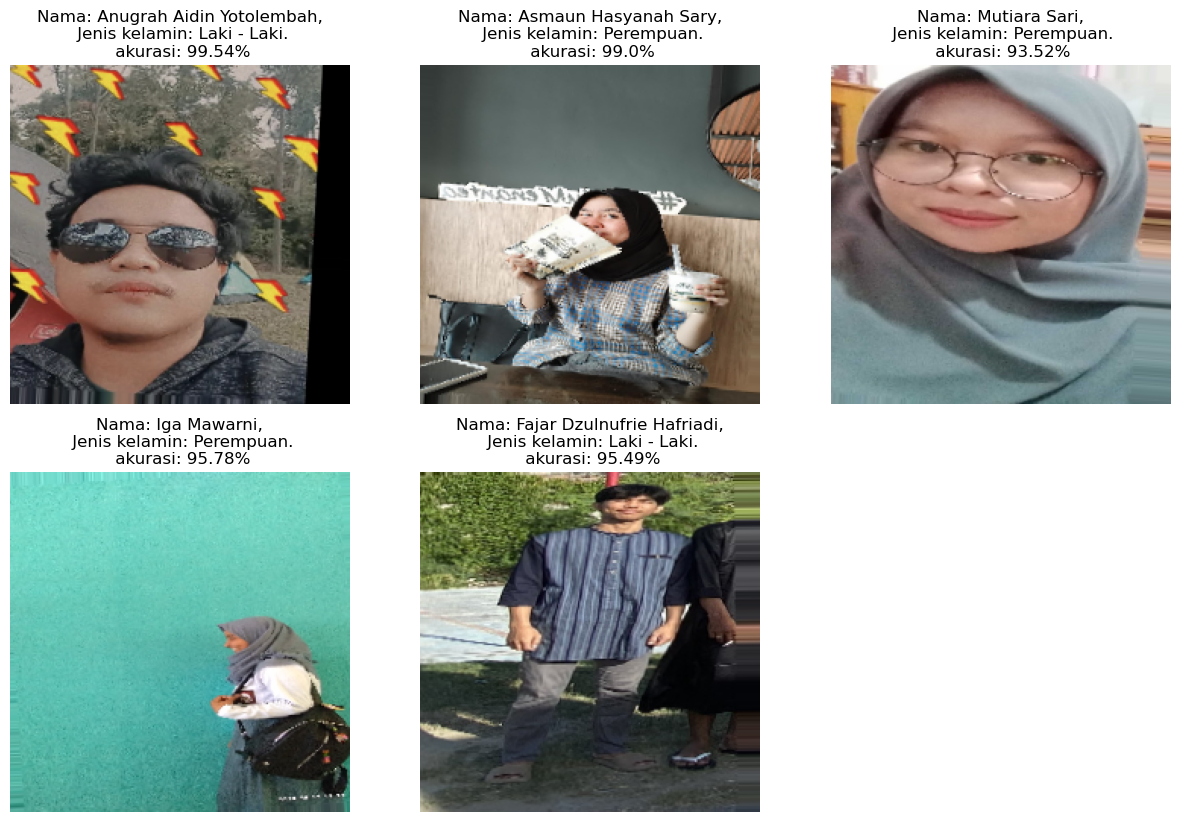

In [334]:
plt.figure(figsize=(15, 15))

for images, labels in test_generator:
    for i in range(5):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        plt.title(f"Nama: {actual_class},\n Jenis kelamin: {predicted_class}.\n akurasi: {confidence}%")
        plt.axis("off")
    break

# Save Model

In [295]:
model.save('model uas deep learning 2023.h5')